{'Year': '2019', 'Device': 'blink-camera', 'Category': 'Camera', 'SLD Count': 6}
{'Year': '2019', 'Device': 'appletv', 'Category': 'TV/ENT', 'SLD Count': 11}
{'Year': '2019', 'Device': 'tplink-plug', 'Category': 'Home Automation', 'SLD Count': 12}
{'Year': '2019', 'Device': 'ring-doorbell', 'Category': 'Camera', 'SLD Count': 8}
{'Year': '2019', 'Device': 'magichome-strip', 'Category': 'Home Automation', 'SLD Count': 3}
{'Year': '2019', 'Device': 'lightify-hub', 'Category': 'Gateway', 'SLD Count': 6}
{'Year': '2019', 'Device': 'nest-tstat', 'Category': 'Home Automation', 'SLD Count': 7}
{'Year': '2019', 'Device': 'blink-security-hub', 'Category': 'Camera', 'SLD Count': 8}
{'Year': '2019', 'Device': 'microseven-camera', 'Category': 'Camera', 'SLD Count': 7}
{'Year': '2019', 'Device': 'lgtv-wired', 'Category': 'TV/ENT', 'SLD Count': 23}
{'Year': '2019', 'Device': 'philips-bulb', 'Category': 'Home Automation', 'SLD Count': 5}
{'Year': '2019', 'Device': 'yi-camera', 'Category': 'Camera', 'S

/tmp/ipykernel_788041/2623582659.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("Set2")


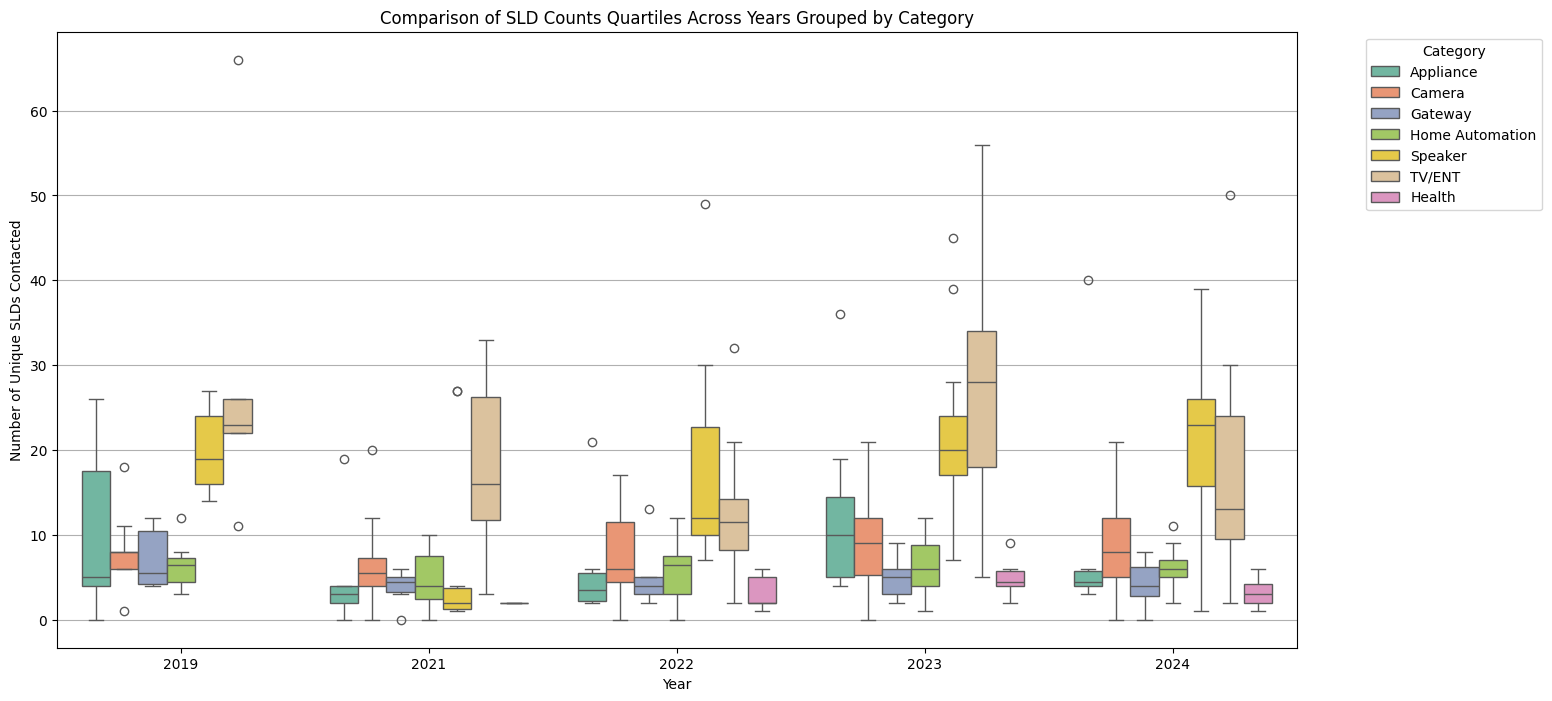

In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# Define file paths and years
base_dir = "/home/hutr/iot-longitudinal/output_destination/all_devices_remove_duplicates"
# base_dir = "/home/hutr/iot-longitudinal/output_destination/common_devices"
years = ["2019", "2021", "2022", "2023", "2024"]
exps = ["idle", "activity", "power"]
# exps=['idle']
file_template = "{year}{exp}/domain_list/contacted_domains_with_all_dns.json"
device_category_file = "/home/hutr/iot-longitudinal/device_category.csv"
# Initialize data storage
data = []
df_device_category = pd.read_csv(device_category_file)
# convert to dict
device_category = df_device_category.set_index('Device').T.to_dict('records')[0]

# Read data and calculate quartiles
device_set = set()
for year in years:
    tmp_year_data = {}
    for exp in exps:
        file_path = os.path.join(base_dir, file_template.format(year=year, exp=exp))
        try:
            with open(file_path, 'r') as f:
                slds_data = json.load(f)
                
            for device, slds in slds_data.items():
                if device not in tmp_year_data:
                    tmp_year_data[device] = []
                tmp_year_data[device].extend(slds)
            
        except Exception as e:
            print(f"Error reading file for year {year}: {e}")
    for device, slds in tmp_year_data.items():
        category = device_category.get(device, 'unknown')
        data.append({"Year": year, "Device": device, "Category": category, "SLD Count": len(slds)})
        print(data[-1])

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by Year and Category
df['Category'] = df['Category'].astype(str)  # Ensure Category is treated as string
df['Year'] = df['Year'].astype(int)  # Ensure Year is treated as integer
df = df.sort_values(by=['Year', 'Category'], ascending=[True, True])

# Generate a color palette for categories
cmap = matplotlib.cm.get_cmap("Set2")
unique_categories = sorted(df['Category'].unique())
palette = dict(zip(unique_categories, cmap.colors[:len(unique_categories)]))
# print(palette)
# Generate a box plot to compare quartiles grouped by category each year
plt.figure(figsize=(16, 8))
sns.boxplot(x="Year", y="SLD Count", hue="Category", data=df, palette=palette)
# sns.stripplot(x="Year", y="SLD Count", hue="Category", data=df, palette="Set3", dodge=True, linewidth=0.5, alpha=0.5)
# for category in df['Category'].unique():
#     sns.lineplot(x="Year", y="SLD Count", data=df[df['Category'] == category], label=category, ci='sd', estimator='mean')
plt.title("Comparison of SLD Counts Quartiles Across Years Grouped by Category")
plt.xlabel("Year")
plt.ylabel("Number of Unique SLDs Contacted")
plt.grid(axis="y")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/tmp/ipykernel_1035679/3118783032.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("Set2")


{'Appliance': (0.4, 0.7607843137254902, 0.6470588235294118), 'Camera': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), 'Gateway': (0.5529411764705883, 0.6274509803921569, 0.796078431372549), 'Health': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), 'Home Automation': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), 'Speaker': (1.0, 0.8509803921568627, 0.1843137254901961), 'TV/ENT': (0.8980392156862745, 0.7686274509803922, 0.5803921568627451)}


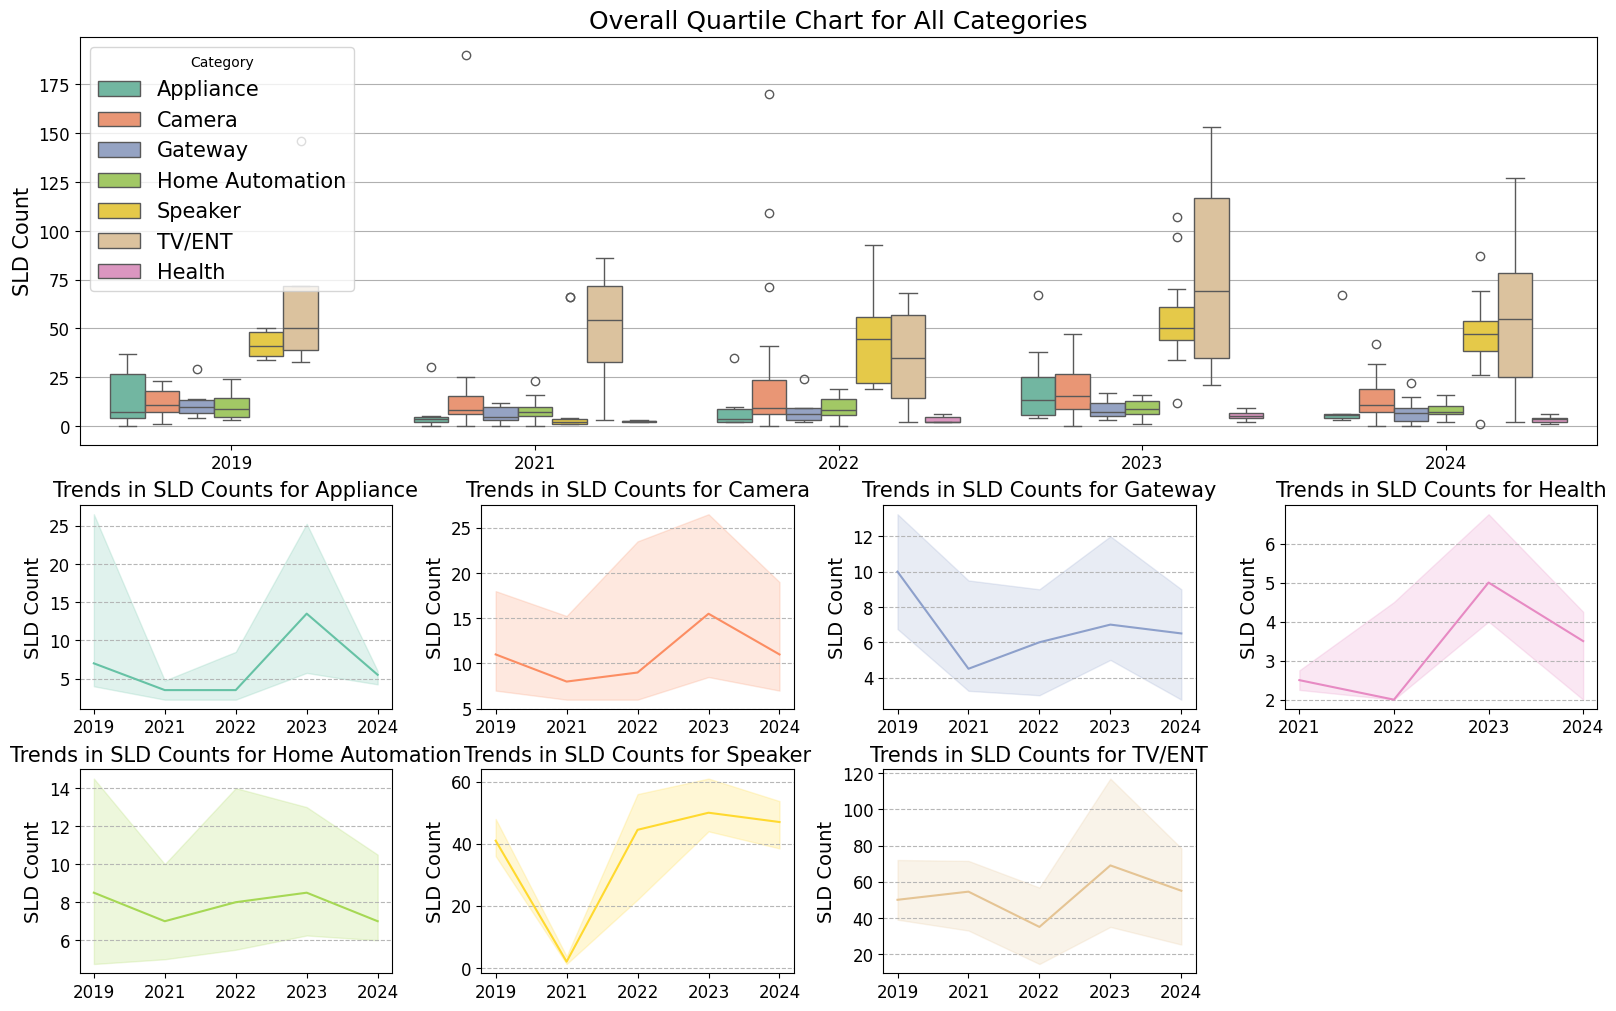

In [6]:

import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def plot_quartile_with_lines(base_dir, years, exps, file_template, output_dir, output_file_name):
    # Initialize data storage
    data = []
    df_device_category = pd.read_csv(device_category_file)
    device_category = df_device_category.set_index('Device').T.to_dict('records')[0]

    # Read data and calculate quartiles
    for year in years:
        tmp_year_data = {}
        for exp in exps:
            file_path = os.path.join(base_dir, file_template.format(year=year, exp=exp))
            try:
                with open(file_path, 'r') as f:
                    slds_data = json.load(f)
                for device, slds in slds_data.items():
                    if device not in tmp_year_data:
                        tmp_year_data[device] = []
                    tmp_year_data[device].extend(slds)
            except Exception as e:
                print(f"Error reading file for year {year}: {e}")
        for device, slds in tmp_year_data.items():
            category = device_category.get(device, 'unknown')
            data.append({"Year": year, "Device": device, "Category": category, "SLD Count": len(slds)})

    # Create a DataFrame
    df = pd.DataFrame(data)
    # Sort the DataFrame by Year and Category
    df['Category'] = df['Category'].astype(str)  # Ensure Category is treated as string
    # df['Year'] = df['Year'].astype(int)  # Ensure Year is treated as integer
    df = df.sort_values(by=['Year', 'Category'], ascending=[True, True])

    # print(df['Category'].unique())
    # Get unique categories and color palette
    cmap = matplotlib.cm.get_cmap("Set2")
    categories = sorted(['Camera','TV/ENT','Home Automation', 'Gateway', 'Appliance', 'Speaker', 'Health'])
    palette = dict(zip(categories, cmap.colors[:len(categories)]))
    
    # palette['Total'] = 'gray'
    print(palette)
    categories = sorted(df['Category'].unique())
    # categories_with_total = categories + ["Total"]

    # Calculate the number of rows needed for the category-specific plots
    n_categories = len(categories)
    n_cols = 4 if n_categories > 6 else 3
    n_rows = -(-n_categories // n_cols)  # Ceiling division to get rows required

    # Create the figure with a larger quartile plot and smaller category-specific plots
    fig = plt.figure(figsize=(16, 6 + n_rows * 2), constrained_layout=True)
    gs = fig.add_gridspec(n_rows + 1, n_cols, height_ratios=[2] + [1] * n_rows)

    # Overall Quartile Chart
    ax_quartile = fig.add_subplot(gs[0, :])  # Span the top row across all columns
    # plot df without "Total"
    sns.boxplot(
        x="Year", 
        y="SLD Count", 
        hue="Category", 
        data=df,  # [df['Category'] != 'Total']
        palette=palette, 
        ax=ax_quartile, 
        # showfliers=False
    )
    ax_quartile.set_title("Overall Quartile Chart for All Categories", fontsize=18)
    ax_quartile.set_xlabel("")
    ax_quartile.set_ylabel("SLD Count", fontsize=15)
    ax_quartile.legend(title="Category", bbox_to_anchor=(0, 1), loc='upper left', fontsize=15)
    ax_quartile.tick_params(axis='both', which='major', labelsize=12)
    ax_quartile.grid(axis="y")

    # Category-Specific Line Charts
    for idx, category in enumerate(categories):
        row = (idx // n_cols) + 1  # Offset by 1 for the quartile chart
        col = idx % n_cols
        ax = fig.add_subplot(gs[row, col])
        category_data = df[df['Category'] == category]
        sns.lineplot(
            x="Year",
            y="SLD Count",
            data=category_data,
            errorbar=("pi", 50),
            estimator='median',
            ax=ax,
            color=palette[category]
        )
        
        ax.set_title(f"Trends in SLD Counts for {category}", fontsize=15)
        ax.set_xlabel("")
        ax.set_ylabel("SLD Count", fontsize=14)
        # set tick font size
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.grid(axis="y", linestyle="--", alpha=0.9)

    # Add shared X-axis label for the bottom row
    # fig.text(0.5, 0.02, 'Year', ha='center', fontsize=14)

    # plt.show()
    plt.savefig(os.path.join(output_dir, output_file_name), bbox_inches='tight')

# Define file paths and years
base_dir = "/home/hutr/iot-longitudinal/output_destination/all_devices_remove_duplicates"
# base_dir = "/home/hutr/iot-longitudinal/output_destination/common_devices"
years = ["2019", "2021", "2022", "2023", "2024"]
exps = ['idle', 'power', 'activity']
# exps = ['idle']
file_template = "{year}{exp}/domain_list/contacted_domains_with_all_dns.json"
# file_template = "{year}{exp}/domain_org/contacted_slds_with_all_dns_org_per_category.csv"
device_category_file = "/home/hutr/iot-longitudinal/device_category.csv"
output_dir = "/home/hutr/iot-longitudinal/iot-longitudinal/destination-analysis/plotting/figures"
plot_quartile_with_lines(base_dir, years, exps, file_template, output_dir, output_file_name="quartile_with_lines_all_devices.pdf")